In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import yfinance as yf
# 한글폰트 출력 가능 코드
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df = pd.read_csv("./pre_kospi.csv")
df

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
0,0,2657.13,-0.0176,2022-04-25,10221,-6542,-3825
1,1,2704.71,-0.0086,2022-04-22,8362,-1556,-6975
2,2,2728.21,0.0035,2022-04-21,-5667,-597,6366
3,3,2718.69,-0.0001,2022-04-20,738,948,-1612
4,4,2718.89,0.0095,2022-04-19,-3431,331,3364
...,...,...,...,...,...,...,...
4276,4276,870.84,-0.0005,2005-01-07,1143,178,-1321
4277,4277,871.28,-0.0157,2005-01-06,858,-6,-852
4278,4278,885.19,-0.0019,2005-01-05,10,246,-256
4279,4279,886.90,-0.0076,2005-01-04,-63,397,-334


In [3]:
df.set_index('날짜',inplace=True)

In [11]:
df_d =  df['외국인순매수'].dropna()-df['외국인순매수'].shift(-1).dropna()
df_d

날짜
2005-01-03       NaN
2005-01-04    -598.0
2005-01-05    -151.0
2005-01-06    -252.0
2005-01-07     184.0
               ...  
2022-04-19    1278.0
2022-04-20     617.0
2022-04-21   -1545.0
2022-04-22    -959.0
2022-04-25   -4986.0
Name: 외국인순매수, Length: 4281, dtype: float64

In [12]:
df_c = abs(df['외국인순매수'].shift(-1).dropna())
df_c

날짜
2022-04-25    1556.0
2022-04-22     597.0
2022-04-21     948.0
2022-04-20     331.0
2022-04-19     947.0
               ...  
2005-01-10     178.0
2005-01-07       6.0
2005-01-06     246.0
2005-01-05     397.0
2005-01-04     995.0
Name: 외국인순매수, Length: 4280, dtype: float64

In [13]:
 df['외국인순매수-차분']= (df_d / df_c) * 100
 df

,Unnamed: 0,종가,등락율,개인순매수,외국인순매수,기관순매수,외국인순매수-차분
날짜,,,,,,,
2022-04-25,0,2657.13,-0.0176,10221,-6542,-3825,-320.437018
2022-04-22,1,2704.71,-0.0086,8362,-1556,-6975,-160.636516
2022-04-21,2,2728.21,0.0035,-5667,-597,6366,-162.974684
2022-04-20,3,2718.69,-0.0001,738,948,-1612,186.404834
2022-04-19,4,2718.89,0.0095,-3431,331,3364,134.952482
...,...,...,...,...,...,...,...
2005-01-07,4276,870.84,-0.0005,1143,178,-1321,3066.666667
2005-01-06,4277,871.28,-0.0157,858,-6,-852,-102.439024
2005-01-05,4278,885.19,-0.0019,10,246,-256,-38.035264


In [16]:

df = df.reset_index()
start_date2 = df["날짜"].astype(str).iloc[-1]
end_date2 = df["날짜"].astype(str).iloc[0]

In [17]:
date_all2 = pd.date_range(start_date2, end_date2, freq='BM').to_frame().rename(columns={0:'날짜'}).reset_index(drop=True)
date_all2

,날짜
0,2005-01-31
1,2005-02-28
2,2005-03-31
3,2005-04-29
4,2005-05-31
...,...
202,2021-11-30
203,2021-12-31
204,2022-01-31
205,2022-02-28


In [18]:
df["날짜"].astype("str")

0       2022-04-25
1       2022-04-22
2       2022-04-21
3       2022-04-20
4       2022-04-19
           ...    
4276    2005-01-07
4277    2005-01-06
4278    2005-01-05
4279    2005-01-04
4280    2005-01-03
Name: 날짜, Length: 4281, dtype: object

In [19]:
df["날짜"]=pd.to_datetime(df["날짜"])

In [20]:
kospi_all2 = pd.merge(date_all2, df, how='left')
#print(f'Nan값 개수 확인 : {kospi_all2["Close"].isna().value_counts()[1]}')

kospi_all2

,날짜,Unnamed: 0,종가,등락율,개인순매수,외국인순매수,기관순매수,외국인순매수-차분
0,2005-01-31,4260.0,932.70,0.0121,-1202.0,-468.0,1670.0,37.181208
1,2005-02-28,4243.0,1011.36,0.0145,-365.0,2884.0,-2519.0,96.860068
2,2005-03-31,4221.0,965.68,0.0107,-659.0,215.0,444.0,110.356455
3,2005-04-29,4201.0,911.30,-0.0070,-807.0,-865.0,1671.0,31.020734
4,2005-05-31,4180.0,970.21,0.0012,-1100.0,79.0,1022.0,-83.711340
...,...,...,...,...,...,...,...,...
202,2021-11-30,98.0,2839.01,-0.0242,7338.0,-1332.0,-6400.0,-436.363636
203,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,2022-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,2022-02-28,38.0,2699.18,0.0084,2908.0,966.0,-3801.0,178.536585


In [21]:
print(f'Nan값 개수 확인 : {kospi_all2["외국인순매수-차분"].isna().value_counts()[1]}')

Nan값 개수 확인 : 22


In [22]:
df_m =kospi_all2.fillna(df.shift(-1))
df_m

,날짜,Unnamed: 0,종가,등락율,개인순매수,외국인순매수,기관순매수,외국인순매수-차분
0,2005-01-31,4260.0,932.70,0.0121,-1202.0,-468.0,1670.0,37.181208
1,2005-02-28,4243.0,1011.36,0.0145,-365.0,2884.0,-2519.0,96.860068
2,2005-03-31,4221.0,965.68,0.0107,-659.0,215.0,444.0,110.356455
3,2005-04-29,4201.0,911.30,-0.0070,-807.0,-865.0,1671.0,31.020734
4,2005-05-31,4180.0,970.21,0.0012,-1100.0,79.0,1022.0,-83.711340
...,...,...,...,...,...,...,...,...
202,2021-11-30,98.0,2839.01,-0.0242,7338.0,-1332.0,-6400.0,-436.363636
203,2021-12-31,204.0,3302.84,0.0051,-8190.0,2451.0,5885.0,338.424125
204,2022-01-31,205.0,3286.10,0.0030,-459.0,-1028.0,1349.0,-948.979592
205,2022-02-28,38.0,2699.18,0.0084,2908.0,966.0,-3801.0,178.536585


In [30]:
df_m.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
df_m

,날짜,종가,등락율,개인순매수,외국인순매수,기관순매수,외국인순매수-차분
0,2005-01-31,932.70,0.0121,-1202.0,-468.0,1670.0,37.181208
1,2005-02-28,1011.36,0.0145,-365.0,2884.0,-2519.0,96.860068
2,2005-03-31,965.68,0.0107,-659.0,215.0,444.0,110.356455
3,2005-04-29,911.30,-0.0070,-807.0,-865.0,1671.0,31.020734
4,2005-05-31,970.21,0.0012,-1100.0,79.0,1022.0,-83.711340
...,...,...,...,...,...,...,...
202,2021-11-30,2839.01,-0.0242,7338.0,-1332.0,-6400.0,-436.363636
203,2021-12-31,3302.84,0.0051,-8190.0,2451.0,5885.0,338.424125
204,2022-01-31,3286.10,0.0030,-459.0,-1028.0,1349.0,-948.979592
205,2022-02-28,2699.18,0.0084,2908.0,966.0,-3801.0,178.536585


In [32]:
df_m.to_csv("./pre_month_kospi_fore_dist.csv")

In [25]:
df_m.isnull().any()

날짜            False
Unnamed: 0    False
종가            False
등락율           False
개인순매수         False
외국인순매수        False
기관순매수         False
외국인순매수-차분     False
dtype: bool

In [28]:
mask =(df_m['날짜']>='2015-01-01')& (df_m['날짜']<='2019-01-01')
df_n = df_m.loc[mask]
df_n.reset_index(drop=True,inplace= True)
df_n.drop('Unnamed: 0',axis=1,inplace=True)
df_n

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,날짜,종가,등락율,개인순매수,외국인순매수,기관순매수,외국인순매수-차분
0,2015-01-30,1949.26,-0.0009,1441.0,-951.0,-324.0,60.896382
1,2015-02-27,1985.80,-0.0037,841.0,838.0,-1638.0,-63.691508
2,2015-03-31,2041.03,0.0054,-267.0,1374.0,-1068.0,80.078637
3,2015-04-30,2127.17,-0.0072,1089.0,716.0,-1628.0,218.739635
4,2015-05-29,2114.80,0.0019,-1702.0,2551.0,-825.0,2.697262
5,2015-06-30,2074.20,0.0067,-310.0,-513.0,835.0,54.400000
6,2015-07-31,2030.16,0.0055,-1401.0,1668.0,-902.0,305.418719
7,2015-08-31,1941.49,0.0020,-68.0,-367.0,333.0,4.177546
8,2015-09-30,1962.81,0.0103,-356.0,1480.0,-1510.0,149.300466
9,2015-10-30,2029.47,-0.0023,1438.0,-277.0,-1300.0,2.807018


C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5,1,'외국인순매수-차분 분포')

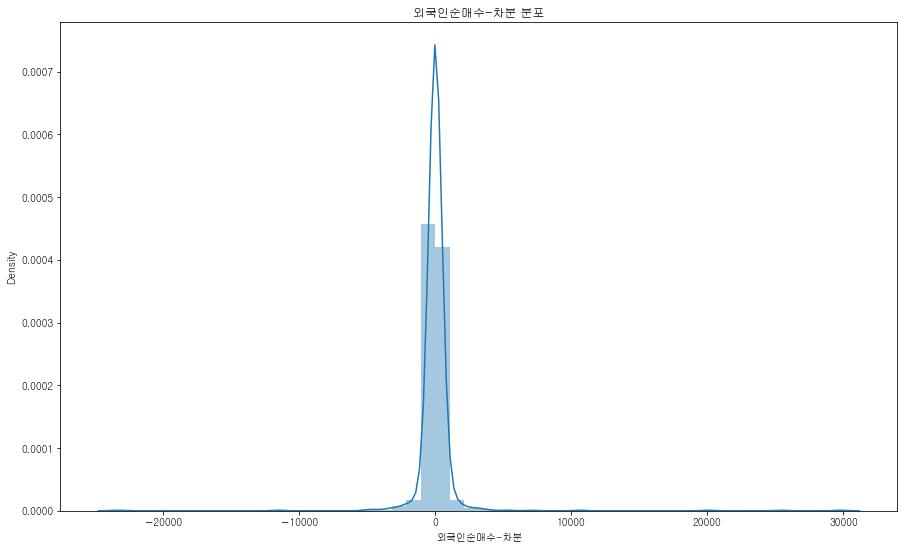

In [20]:
plt.figure(figsize= (15,9))
sns.distplot(df_n['외국인순매수-차분'])
plt.title('외국인순매수-차분 분포')

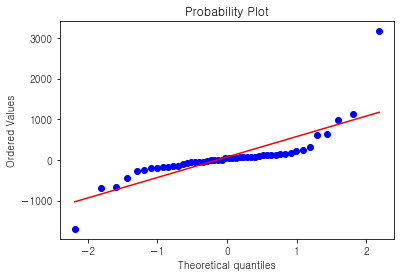

In [33]:
# 정규성 검정 (시각화)
from scipy.stats import probplot

# 시각화 
probplot(df_n['외국인순매수-차분'],plot=plt) 
plt.show()

In [34]:
# shapiro 검정 시행
from scipy.stats import shapiro

test_stat, pval = shapiro(df_n['외국인순매수-차분'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(pd.DataFrame(df_n['외국인순매수-차분']))

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  0.00000063% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.
p값이  0.00000000% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.


In [35]:
# shapiro 검정 시행
from scipy.stats import shapiro

test_stat, pval = shapiro(df_n['외국인순매수'])

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(pd.DataFrame(df_n['외국인순매수']))

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  40.47533870% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  25.61468717% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
